(scikit-learn-chapter)=

# `scikit-learn`: machine learning in Python

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Authors**: _Gael Varoquaux_

![](images/scikit-learn-logo.png)

:::{admonition} Prerequisites

- {ref}`numpy <numpy>`
- {ref}`scipy <scipy>`
- {ref}`matplotlib (optional) <matplotlib>`
- {ref}`ipython (the enhancements come in handy) <interactive-work>`
  :::

:::{sidebar} Acknowledgements

This chapter is adapted from [a
tutorial](https://www.youtube.com/watch?v=r4bRUvvlaBw) given by Gaël
Varoquaux, Jake Vanderplas, Olivier Grisel.

:::

:::{admonition} See also

**Data science in Python**

- The {ref}`statistics` chapter may also be of interest
  for readers looking into machine learning.
- The [documentation of scikit-learn](https://scikit-learn.org) is
  very complete and didactic.

:::

## Introduction: problem settings

### What is machine learning?

::: {note}
:class: dropdown

Machine Learning is about building programs with **tunable
parameters** that are adjusted automatically so as to improve their
behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial
Intelligence** since those algorithms can be seen as building blocks
to make computers learn to behave more intelligently by somehow
**generalizing** rather that just storing and retrieving data items
like a database system would do.
:::

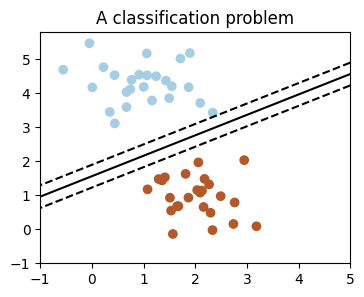

In [2]:
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import make_blobs

# we create 50 separable synthetic points
X, Y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1, x2]])
    Z[i, j] = p[0]

plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.contour(
    X1, X2, Z, [-1.0, 0.0, 1.0], colors="k", linestyles=["dashed", "solid", "dashed"]
)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap="Paired")
ax.set_title('A classification problem')
ax.axis("tight");

We'll take a look at two very simple machine learning tasks here. The
first is a **classification** task: the figure shows a collection of
two-dimensional data, colored according to two different class labels. A
classification algorithm may be used to draw a dividing boundary between
the two clusters of points:

By drawing this separating line, we have learned a model which can
**generalize** to new data: if you were to drop another point onto the
plane which is unlabeled, this algorithm could now **predict** whether
it's a blue or a red point.

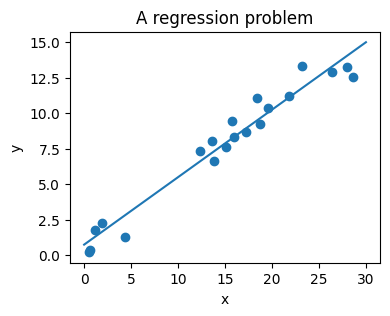

In [3]:
from sklearn.linear_model import LinearRegression

# x from 0 to 30
rng = np.random.default_rng()
x = 30 * rng.random((20, 1))
# y = a*x + b with noise
y = 0.5 * x + 1.0 + rng.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis("tight")
ax.set_title('A regression problem');

The next simple task we'll look at is a **regression** task: a simple
best-fit line to a set of data.

Again, this is an example of fitting a model to data, but our focus here
is that the model can make generalizations about new data. The model has
been **learned** from the training data, and can be used to predict the
result of test data: here, we might be given an x-value, and the model
would allow us to predict the y value.

### Data in Scikit-learn

#### The data matrix

Machine learning algorithms implemented in scikit-learn expect data
to be stored in a **two-dimensional array or matrix**. The arrays can be
either `numpy` arrays, or in some cases `scipy.sparse` matrices. The
size of the array is expected to be `[n_samples, n_features]`

- **n_samples:** The number of samples: each sample is an item to
  process (e.g. classify). A sample can be a document, a picture, a
  sound, a video, an astronomical object, a row in database or CSV
  file, or whatever you can describe with a fixed set of quantitative
  traits.
- **n_features:** The number of features or distinct traits that can
  be used to describe each item in a quantitative manner. Features are
  generally real-valued, but may be boolean or discrete-valued in some
  cases.

::: {note}
:class: dropdown

The number of features must be fixed in advance. However it can be
very high dimensional (e.g. millions of features) with most of them
being zeros for a given sample. This is a case where `scipy.sparse`
matrices can be useful, in that they are much more memory-efficient
than NumPy arrays.
:::

#### A Simple Example: the Iris Dataset

##### The application problem

As an example of a simple dataset, let us a look at the
iris data stored by scikit-learn. Suppose we want to recognize species of
irises. The data consists of measurements of
three different species of irises:

| ![](images/iris_setosa.jpg) | ![](images/iris_versicolor.jpg) | ![](images/iris_virginica.jpg) |
| :-------------------------: | :-----------------------------: | :----------------------------: |
|         Setosa Iris         |         Versicolor Iris         |         Virginica Iris         |

:::{admonition} Quick Question:

**If we want to design an algorithm to recognize iris species, what
might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?
- What might the `n_features` refer to?
  :::

Remember that there must be a **fixed** number of features for each
sample, and feature number `i` must be a similar kind of quantity for
each sample.

##### Loading the Iris Data with Scikit-learn

Scikit-learn has a very straightforward set of data on these iris
species. The data consist of the following:

- Features in the Iris dataset:

  - sepal length (cm)
  - sepal width (cm)
  - petal length (cm)
  - petal width (cm)

- Target classes to predict:

  - Setosa
  - Versicolour
  - Virginica

{mod}`scikit-learn` embeds a copy of the iris CSV file along with a
function to load it into NumPy arrays:

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()

:::{note}
**Import sklearn** Note that scikit-learn is imported as {mod}`sklearn`
:::

The features of each sample flower are stored in the `data` attribute
of the dataset:

In [5]:
iris.data.shape

(150, 4)

In [6]:
n_samples, n_features = iris.data.shape
n_samples

150

In [7]:
n_features

4

In [8]:
iris.data[0]

array([5.1, 3.5, 1.4, 0.2])

The information about the class of each sample is stored in the
`target` attribute of the dataset:

In [9]:
iris.target.shape

(150,)

In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

The names of the classes are stored in the last attribute, namely
`target_names`:

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

This data is four-dimensional, but we can visualize two of the
dimensions at a time using a scatter plot:

::: {note}

There is a more elaborate visualization of this dataset is detailed in the
{ref}`statistics` chapter.

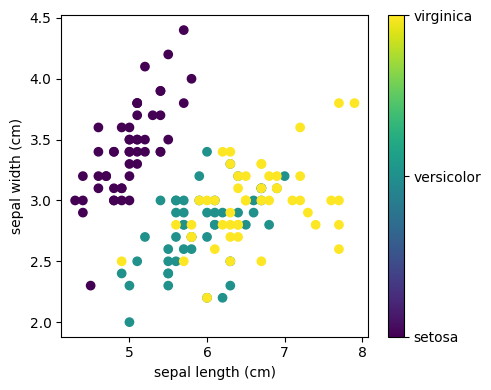

In [12]:
from matplotlib import ticker

# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = ticker.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.tight_layout()

::: {exercise-start}
:label: chose-two-features
:class: dropdown
:::

Can you choose 2 features to find a plot where it is easier to
separate the different classes of irises?

**Hint**: click on the figure above to see the code that generates it,
and modify this code.

::: {exercise-end}
:::

## Basic principles of machine learning with Scikit-learn

### Introducing the Scikit-learn estimator object

Every algorithm is exposed in Scikit-learn via an "Estimator" object. For
instance a linear regression is:
{class}`sklearn.linear_model.LinearRegression`

In [13]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set
when it is instantiated:

In [14]:
model = LinearRegression(n_jobs=1)
model

LinearRegression(n_jobs=1)

#### Fitting on data

Let's create some simple data with {ref}`numpy <numpy>`:

In [15]:
import numpy as np
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

In [16]:
# The input data for sklearn is 2D: (samples == 3 x features == 1)
X = x[:, np.newaxis]
X

array([[0],
       [1],
       [2]])

In [17]:
model.fit(X, y)

LinearRegression(n_jobs=1)

**Estimated parameters**: When data is fitted with an estimator,
parameters are estimated from the data at hand. All the estimated
parameters are attributes of the estimator object ending by an
underscore:

In [18]:
model.coef_

array([1.])

### Supervised Learning: Classification and regression

In **Supervised Learning**, we have a dataset consisting of both
features and labels. The task is to construct an estimator which is able
to predict the label of an object given the set of features. A
relatively simple example is predicting the species of iris given a set
of measurements of its flower. This is a relatively simple task. Some
more complicated examples are:

- given a multicolor image of an object through a telescope, determine
  whether that object is a star, a quasar, or a galaxy.
- given a photograph of a person, identify the person in the photo.
- given a list of movies a person has watched and their personal rating
  of the movie, recommend a list of movies they would like (So-called
  _recommender systems_: a famous example is the [Netflix
  Prize](https://en.wikipedia.org/wiki/Netflix_prize)).

::: {note}
:class: dropdown

What these tasks have in common is that there is one or more unknown
quantities associated with the object which needs to be determined from
other observed quantities.
:::

Supervised learning is further broken down into two categories,
**classification** and **regression**. In classification, the label is
discrete, while in regression, the label is continuous. For example, in
astronomy, the task of determining whether an object is a star, a
galaxy, or a quasar is a classification problem: the label is from three
distinct categories. On the other hand, we might wish to estimate the
age of an object based on such observations: this would be a regression
problem, because the label (age) is a continuous quantity.

**Classification**: K nearest neighbors (kNN) is one of the simplest
learning strategies: given a new, unknown observation, look up in your
reference database which ones have the closest features and assign the
predominant class. Let's try it out on our iris classification problem:

In [19]:
from sklearn import neighbors, datasets

X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
iris.target_names[knn.predict([[3, 5, 4, 2]])]

array(['virginica'], dtype='<U10')

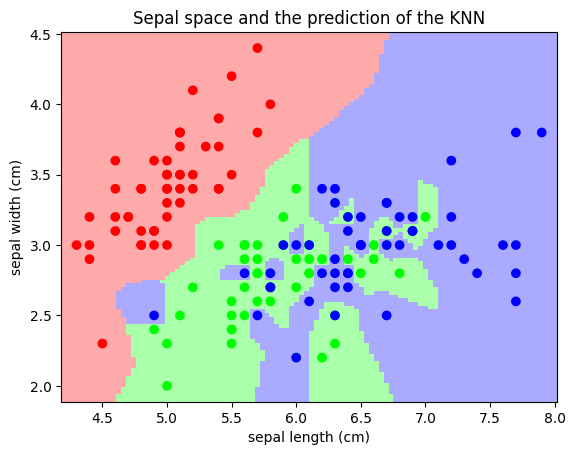

In [20]:
from matplotlib.colors import ListedColormap

# Create color maps for 3-class classification problem, as with iris
cmap_light = ListedColormap(["#FFAAAA", "#AAFFAA", "#AAAAFF"])
cmap_bold = ListedColormap(["#FF0000", "#00FF00", "#0000FF"])

X = iris.data[:, :2]  # we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
y = iris.target

knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max,
100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.axis("tight")
plt.title('Sepal space and the prediction of the KNN');

**Regression**: The simplest possible regression setting is the linear
regression one:

In [21]:
from sklearn.linear_model import LinearRegression

# x from 0 to 30
rng = np.random.default_rng()
x = 30 * rng.random((20, 1))

# y = a*x + b with noise
y = 0.5 * x + 1.0 + rng.normal(size=x.shape)

# create a linear regression model
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [22]:
# predict y from the data
x_new = np.linspace(0, 30, 100)
y_new = model.predict(x_new[:, np.newaxis])

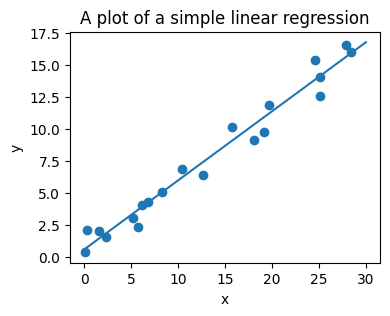

In [23]:
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(x, y)
ax.plot(x_new, y_new)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.axis("tight");
ax.set_title('A plot of a simple linear regression');

### A recap on Scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods, and
we’ll see examples of these below. Given a scikit-learn _estimator_
object named `model`, the following methods are available:

::: {list-table} Estimator interfaces

- - All Estimators
  - - `model.fit()` : fit training data. For supervised learning
      applications, this accepts two arguments: the data `X` and the labels
      `y` (e.g. `model.fit(X, y)`). For unsupervised learning
      applications, this accepts only a single argument, the data `X` (e.g.
      `model.fit(X)`).
- - Supervised estimators
  - - `model.predict()` : given a trained model, predict the label of a new
      set of data. This method accepts one argument, the new data `X_new`
      (e.g. `model.predict(X_new)`), and returns the learned label for each
      object in the array.
    - `model.predict_proba()` : For classification problems, some estimators
      also provide this method, which returns the probability that a new
      observation has each categorical label. In this case, the label with the
      highest probability is returned by `model.predict()`.
    - `model.score()` : for classification or regression problems, most
      (all?) estimators implement a score method. Scores are between 0 and 1,
      with a larger score indicating a better fit.
- - Unsupervised estimators
  - - `model.transform()` : given an unsupervised model, transform new data
      into the new basis. This also accepts one argument `X_new`, and
      returns the new representation of the data based on the unsupervised
      model.
    - `model.fit_transform()` : some estimators implement this method, which
      more efficiently performs a fit and a transform on the same input data.

:::

### Regularization: what it is and why it is necessary

#### Preferring simpler models

**Train errors** Suppose you are using a 1-nearest neighbor estimator.
How many errors do you expect on your train set?

- Train set error is not a good measurement of prediction performance.
  You need to leave out a test set.
- In general, we should accept errors on the train set.

**An example of regularization** The core idea behind regularization is that
we are going to prefer models that are simpler, for a certain definition of
''simpler'', even if they lead to more errors on the train set.

As an example, let's generate with a 9th order polynomial, with noise:

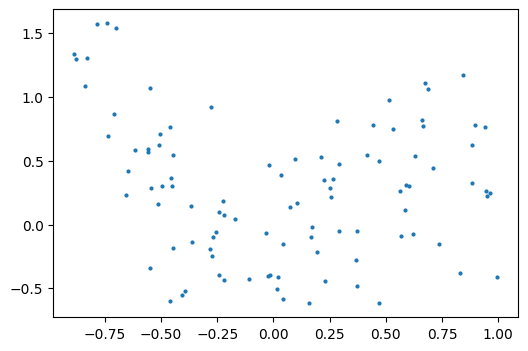

In [24]:
from sklearn import linear_model

rng = np.random.default_rng(27446968)
x = 2 * rng.random(100) - 1

f = lambda t: 1.2 * t**2 + 0.1 * t**3 - 0.4 * t**5 - 0.5 * t**9
y = f(x) + 0.4 * rng.normal(size=100)

x_test = np.linspace(-1, 1, 100)
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4);

And now, let's fit a 4th order and a 9th order polynomial to the data.

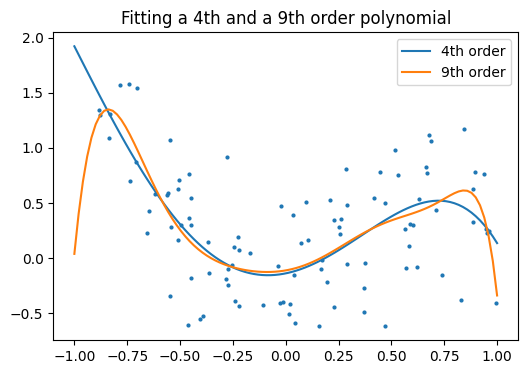

In [25]:
# Fitting 4th and 9th order polynomials
#
# For this we need to engineer features: the n_th powers of x:
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label="4th order")

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(x_test, regr.predict(X_test), label="9th order")

plt.legend(loc="best")
plt.axis("tight")
plt.title("Fitting a 4th and a 9th order polynomial");

With your naked eye, which model do you prefer, the 4th order one, or the 9th
order one?

Let's look at the ground truth:

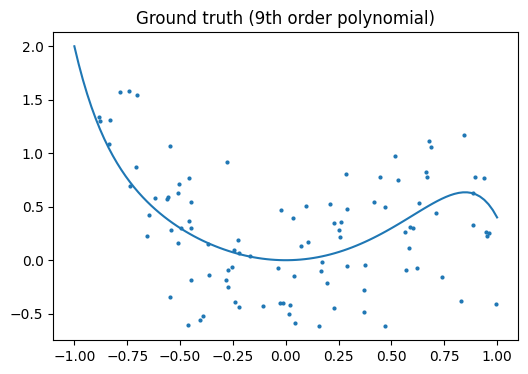

In [26]:
# Ground truth
plt.figure(figsize=(6, 4))
plt.scatter(x, y, s=4)
plt.plot(x_test, f(x_test), label="truth")
plt.axis("tight")
plt.title("Ground truth (9th order polynomial)");

::: {note}
:class: dropdown

Regularization is ubiquitous in machine learning. Most scikit-learn
estimators have a parameter to tune the amount of regularization. For
instance, with k-NN, it is 'k', the number of nearest neighbors used to
make the decision. k=1 amounts to no regularization: 0 error on the
training set, whereas large k will push toward smoother decision
boundaries in the feature space.
:::

#### Simple versus complex models for classification

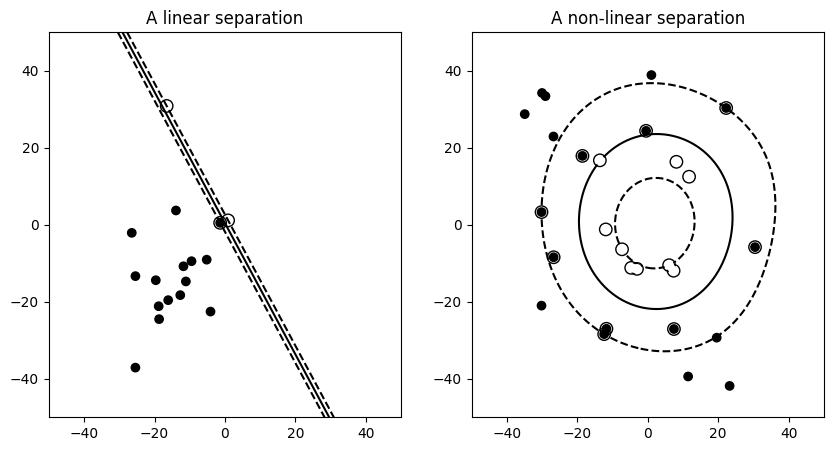

In [27]:
# This is an example plot from the tutorial which accompanies an explanation
# of the support vector machine GUI.

from sklearn import svm

rng = np.random.default_rng(27446968)

# Data that is linearly separable
def linear_model(rng, n_samples=30):
    "Generate data according to a linear model"
    data = rng.normal(0, 10, (n_samples, 2))
    data[: n_samples // 2] -= 15
    data[n_samples // 2 :] += 15

    labels = np.ones(n_samples)
    labels[: n_samples // 2] = -1

    return data, labels

X, y = linear_model(rng)
clf = svm.SVC(kernel="linear")
clf.fit(X, y)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes[0]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bone")
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    edgecolors="k",
    facecolors="none",
)
delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
ax.contour(
    X1, X2, Z, [-1.0, 0.0, 1.0], colors="k", linestyles=["dashed", "solid", "dashed"]
)
ax.set_title("A linear separation")

# Data with a non-linear separation

def nonlinear_model(rng, n_samples=30):
    radius = 40 * rng.random(n_samples)
    far_pts = radius > 20
    radius[far_pts] *= 1.2
    radius[~far_pts] *= 1.1

    theta = rng.random(n_samples) * np.pi * 2

    data = np.empty((n_samples, 2))
    data[:, 0] = radius * np.cos(theta)
    data[:, 1] = radius * np.sin(theta)

    labels = np.ones(n_samples)
    labels[far_pts] = -1

    return data, labels

rng = np.random.default_rng(27446968)

X, y = nonlinear_model(rng)
clf = svm.SVC(kernel="rbf", gamma=0.001, coef0=0, degree=3)
clf.fit(X, y)

ax = axes[1]
ax.scatter(X[:, 0], X[:, 1], c=y, cmap="bone", zorder=2)
ax.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    edgecolors="k",
    facecolors="none",
)
delta = 1
y_min, y_max = -50, 50
x_min, x_max = -50, 50
x = np.arange(x_min, x_max + delta, delta)
y = np.arange(y_min, y_max + delta, delta)
X1, X2 = np.meshgrid(x, y)
Z = clf.decision_function(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
ax.contour(
    X1,
    X2,
    Z,
    [-1.0, 0.0, 1.0],
    colors="k",
    linestyles=["dashed", "solid", "dashed"],
    zorder=1,
)
ax.set_title("A non-linear separation");

::: {note}
:class: dropdown

For classification models, the decision boundary, that separates the
class expresses the complexity of the model. For instance, a linear
model, that makes a decision based on a linear combination of
features, is more complex than a non-linear one.
:::

## Supervised Learning: Classification of Handwritten Digits

### The nature of the data

In this section we'll apply scikit-learn to the classification of
handwritten digits. This will go a bit beyond the iris classification we
saw before: we'll discuss some of the metrics which can be used in
evaluating the effectiveness of a classification model.

In [28]:
from sklearn.datasets import load_digits
digits = load_digits()

Let us visualize the data and remind us what we're looking at:

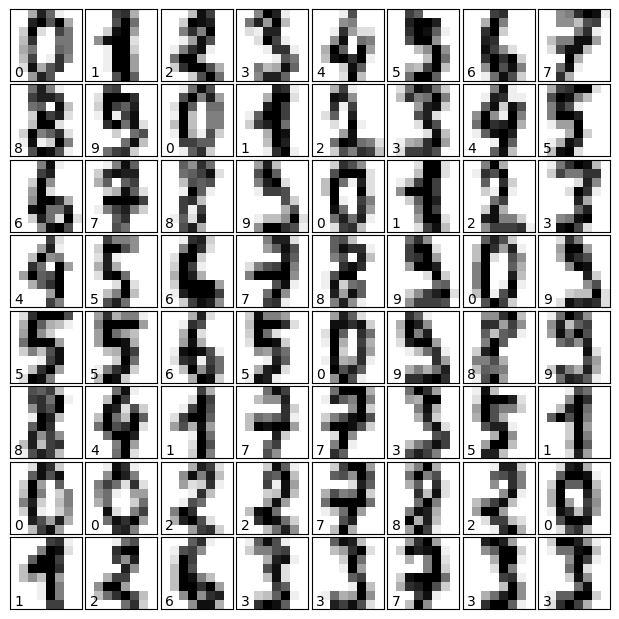

In [29]:
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap="binary", interpolation="nearest")
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

### Visualizing the Data on its principal components

A good first-step for many problems is to visualize the data using a
_Dimensionality Reduction_ technique. We'll start with the most
straightforward one, [Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis).

PCA seeks orthogonal linear combinations of the features which show the
greatest variance, and as such, can help give you a good idea of the
structure of the data set.

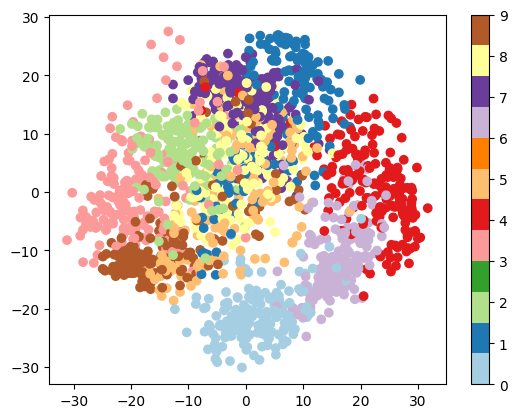

In [30]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target, cmap='Paired')
plt.colorbar();

:::{admonition} Question

Given these projections of the data, which numbers do you think a
classifier might have trouble distinguishing?
:::

### Gaussian Naive Bayes Classification

For most classification problems, it's nice to have a simple, fast
method to provide a quick baseline classification. If the simple
and fast method is sufficient, then we don't have to waste CPU cycles on
more complex models. If not, we can use the results of the simple method
to give us clues about our data.

One good method to keep in mind is Gaussian Naive Bayes
({class}`sklearn.naive_bayes.GaussianNB`).

:::{sidebar} Old scikit-learn versions
{func}`~sklearn.model_selection.train_test_split` is imported from
`sklearn.cross_validation`
:::

::: {note}
:class: dropdown

Gaussian Naive Bayes fits a Gaussian distribution to each training label
independently on each feature, and uses this to quickly give a rough
classification. It is generally not sufficiently accurate for real-world
data, but can perform surprisingly well, for instance on text data.
:::

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [32]:
# split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
   digits.data, digits.target, random_state=42)

In [33]:
# train the model
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [34]:
# use the model to predict the labels of the test data
predicted = clf.predict(X_test)
predicted

array([6, 9, 3, 7, 2, 2, 5, 8, 5, 2, 1, 1, 7, 0, 4, 8, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 2, 5, 6, 0, 9, 0, 0, 1, 7, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 9, 5, 7, 7, 0, 4, 5, 5, 5, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 1, 3, 5, 2, 9, 0, 4, 7, 4, 3, 5, 3, 1, 8, 5, 7, 4, 2,
       7, 7, 7, 6, 1, 9, 8, 7, 8, 7, 2, 6, 9, 4, 5, 7, 8, 7, 5, 8, 5, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 8, 9, 6, 9, 0, 5, 5, 6, 6, 0,
       6, 4, 2, 3, 3, 7, 7, 2, 9, 0, 4, 5, 8, 6, 5, 7, 9, 8, 4, 8, 1, 3,
       7, 7, 2, 8, 3, 9, 8, 0, 3, 8, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 8, 8, 6, 0, 4, 5,
       8, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 9, 5, 1, 4, 7, 6, 8, 1, 5,
       5, 1, 4, 1, 8, 8, 7, 5, 7, 6, 2, 2, 2, 3, 4, 8, 7, 8, 6, 0, 8, 7,
       7, 0, 1, 0, 4, 5, 8, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 7, 5, 3, 3, 1, 0, 5, 8, 3, 4, 0, 2,

In [35]:
expected = y_test
expected

array([6, 9, 3, 7, 2, 1, 5, 2, 5, 2, 1, 9, 4, 0, 4, 2, 3, 7, 8, 8, 4, 3,
       9, 7, 5, 6, 3, 5, 6, 3, 4, 9, 1, 4, 4, 6, 9, 4, 7, 6, 6, 9, 1, 3,
       6, 1, 3, 0, 6, 5, 5, 1, 9, 5, 6, 0, 9, 0, 0, 1, 0, 4, 5, 2, 4, 5,
       7, 0, 7, 5, 9, 5, 5, 4, 7, 0, 4, 5, 5, 9, 9, 0, 2, 3, 8, 0, 6, 4,
       4, 9, 1, 2, 8, 3, 5, 2, 9, 0, 4, 4, 4, 3, 5, 3, 1, 3, 5, 9, 4, 2,
       7, 7, 4, 4, 1, 9, 2, 7, 8, 7, 2, 6, 9, 4, 0, 7, 2, 7, 5, 8, 7, 5,
       7, 7, 0, 6, 6, 4, 2, 8, 0, 9, 4, 6, 9, 9, 6, 9, 0, 3, 5, 6, 6, 0,
       6, 4, 3, 9, 3, 9, 7, 2, 9, 0, 4, 5, 3, 6, 5, 9, 9, 8, 4, 2, 1, 3,
       7, 7, 2, 2, 3, 9, 8, 0, 3, 2, 2, 5, 6, 9, 9, 4, 1, 5, 4, 2, 3, 6,
       4, 8, 5, 9, 5, 7, 8, 9, 4, 8, 1, 5, 4, 4, 9, 6, 1, 8, 6, 0, 4, 5,
       2, 7, 4, 6, 4, 5, 6, 0, 3, 2, 3, 6, 7, 1, 5, 1, 4, 7, 6, 8, 8, 5,
       5, 1, 6, 2, 8, 8, 9, 9, 7, 6, 2, 2, 2, 3, 4, 8, 8, 3, 6, 0, 9, 7,
       7, 0, 1, 0, 4, 5, 1, 5, 3, 6, 0, 4, 1, 0, 0, 3, 6, 5, 9, 7, 3, 5,
       5, 9, 9, 8, 5, 3, 3, 2, 0, 5, 8, 3, 4, 0, 2,

As above, we plot the digits with the predicted labels to get an idea of
how well the classification is working.

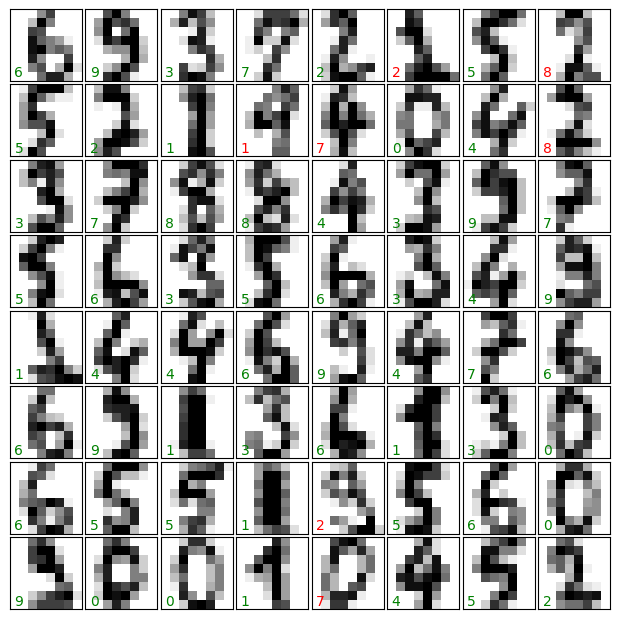

In [36]:
# plot the digits: each image is 8x8 pixels
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test.reshape(-1, 8, 8)[i], cmap="binary", interpolation="nearest")

    # label the image with the target value
    if predicted[i] == expected[i]:
        ax.text(0, 7, str(predicted[i]), color="green")
    else:
        ax.text(0, 7, str(predicted[i]), color="red")

:::{admonition} Question

Why did we split the data into training and validation sets?

:::

### Quantitative Measurement of Performance

We'd like to measure the performance of our estimator without having to
resort to plotting examples. A simple method might be to simply compare
the number of matches:

In [37]:
# The number of correct matches
matches = (predicted == expected)
matches.sum()

np.int64(385)

In [38]:
# The total number of data points
len(matches)

450

In [39]:
# The ratio of correct predictions
matches.sum() / float(len(matches))

np.float64(0.8555555555555555)

We see that more than 80% of the 450 predictions match the input. But
there are other more sophisticated metrics that can be used to judge the
performance of a classifier: several are available in the
{mod}`sklearn.metrics` submodule.

One of the most useful metrics is the `classification_report`, which
combines several measures and prints a table with the results:

In [40]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.85      0.78      0.82        37
           2       0.85      0.61      0.71        38
           3       0.97      0.83      0.89        46
           4       0.98      0.84      0.90        55
           5       0.90      0.95      0.93        59
           6       0.90      0.96      0.92        45
           7       0.71      0.98      0.82        41
           8       0.60      0.89      0.72        38
           9       0.90      0.73      0.80        48

    accuracy                           0.86       450
   macro avg       0.87      0.85      0.85       450
weighted avg       0.88      0.86      0.86       450



Another enlightening metric for this sort of multi-label classification
is a _confusion matrix_: it helps us visualize which labels are being
interchanged in the classification errors:

In [41]:
metrics.confusion_matrix(expected, predicted)

array([[41,  0,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 0, 29,  2,  0,  0,  0,  0,  0,  4,  2],
       [ 0,  2, 23,  0,  0,  0,  1,  0, 12,  0],
       [ 0,  0,  1, 38,  0,  1,  0,  0,  5,  1],
       [ 0,  0,  0,  0, 46,  0,  2,  7,  0,  0],
       [ 0,  0,  0,  0,  0, 56,  1,  1,  0,  1],
       [ 0,  0,  0,  0,  1,  1, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0, 40,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0,  2, 34,  0],
       [ 0,  1,  1,  1,  0,  2,  1,  5,  2, 35]])

We see here that in particular, the numbers 1, 2, 3, and 9 are often
being labeled 8.

## Supervised Learning: Regression of Housing Data

Here we'll do a short example of a regression problem: learning a
continuous value from a set of features.

### A quick look at the data

We'll use the California house prices set, available in Scikit-learn.
This records measurements of 8 attributes of housing markets in
California, as well as the median price. The question is: can you predict
the price of a new market given its attributes?:

In [42]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
data.data.shape

(20640, 8)

In [43]:
data.target.shape

(20640,)

We can see that there are just over 20000 data points.

The `DESCR` variable has a long description of the dataset:

In [44]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

It often helps to quickly visualize pieces of the data using histograms,
scatter plots, or other plot types. With matplotlib, let us show a
histogram of the target values: the median price in each neighborhood:

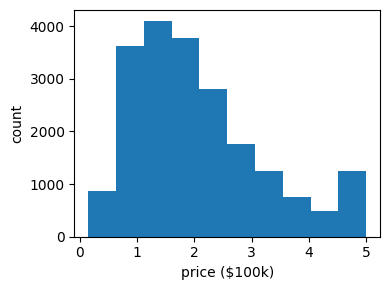

In [45]:
plt.figure(figsize=(4, 3))
plt.hist(data.target)
plt.xlabel("price ($100k)")
plt.ylabel("count")
plt.tight_layout()

Let's have a quick look to see if some features are more relevant than
others for our problem:

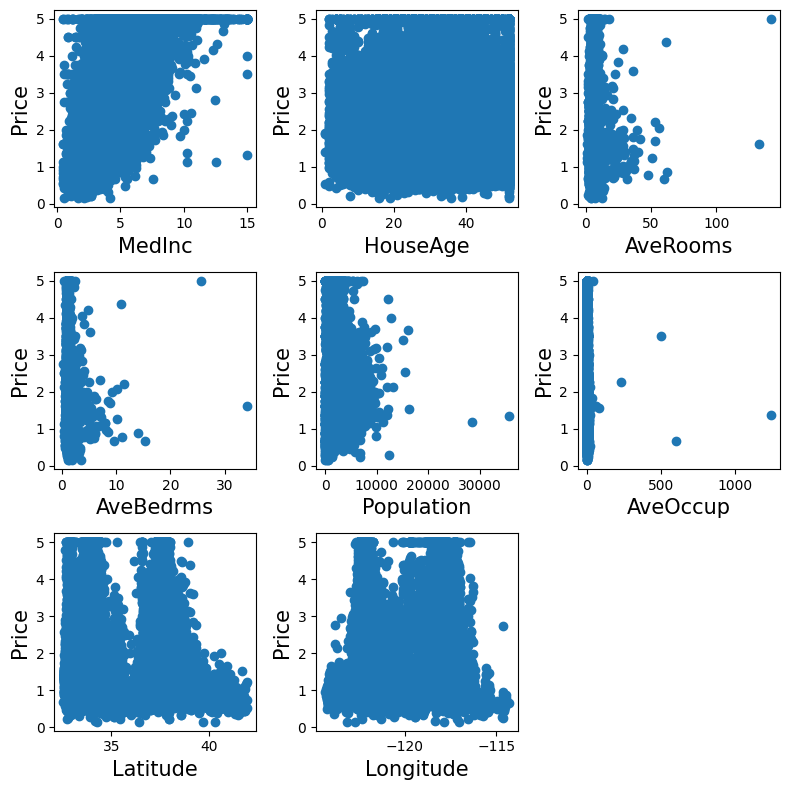

In [46]:
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.ravel()
for index, feature_name in enumerate(data.feature_names):
    ax = axes[index]
    ax.scatter(data.data[feature_name], data.target)
    ax.set_ylabel("Price", size=15)
    ax.set_xlabel(feature_name, size=15)
axes[-1].axis('off')
plt.tight_layout()

This is a manual version of a technique called **feature selection**.

::: {note}
:class: dropdown

Sometimes, in Machine Learning it is useful to use feature selection to
decide which features are the most useful for a particular problem.
Automated methods exist which quantify this sort of exercise of choosing
the most informative features.
:::

### Predicting Home Prices: a Simple Linear Regression

Now we'll use `scikit-learn` to perform a simple linear regression on
the housing data. There are many possibilities of regressors to use. A
particularly simple one is `LinearRegression`: this is basically a
wrapper around an ordinary least squares calculation.

In [47]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [48]:
predicted = clf.predict(X_test)
expected = y_test
print("RMS: %s" % np.sqrt(np.mean((predicted - expected) ** 2)))

RMS: 0.719042838643998


We can plot the error: expected as a function of predicted:

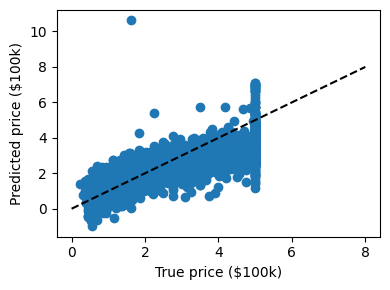

In [49]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 8], [0, 8], "--k")
plt.axis("tight")
plt.xlabel("True price ($100k)")
plt.ylabel("Predicted price ($100k)")
plt.tight_layout()

::: {note}
:class: dropdown

The prediction at least correlates with the true price, though there are
clearly some biases. We could imagine evaluating the performance of the
regressor by, say, computing the RMS residuals between the true and
predicted price. There are some subtleties in this, however, which we'll
cover in a later section.
:::

::: {exercise-start}
:label: gradient-boost-tree-ex
:class: dropdown
:::

There are many other types of regressors available in scikit-learn:
we'll try a more powerful one here.

**Use the GradientBoostingRegressor class to fit the housing data**.

**hint** You can copy and paste some of the above code, replacing
{class}`~sklearn.linear_model.LinearRegression` with
{class}`~sklearn.ensemble.GradientBoostingRegressor`:

In [50]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate the model, fit the results, and scatter in vs. out

::: {exercise-end}
:::

::: {solution-start} gradient-boost-tree-ex
:class: dropdown
:::

In [51]:
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

GradientBoostingRegressor()

In [52]:
predicted = clf.predict(X_test)
expected = y_test

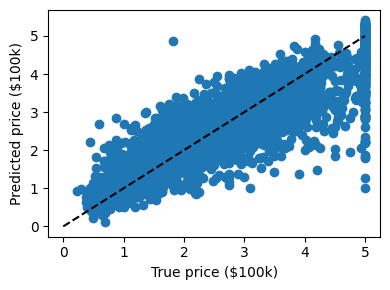

In [53]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 5], [0, 5], "--k")
plt.axis("tight")
plt.xlabel("True price ($100k)")
plt.ylabel("Predicted price ($100k)")
plt.tight_layout()

In [54]:
# Print the error rate
print(f"RMS: {np.sqrt(np.mean((predicted - expected) ** 2))!r} ")

RMS: np.float64(0.5229911380498878) 


::: {solution-end}
:::

## Measuring prediction performance

### A quick test on the K-neighbors classifier

Here we'll continue to look at the digits data, but we'll switch to the
K-Neighbors classifier. The K-neighbors classifier is an instance-based
classifier. The K-neighbors classifier predicts the label of
an unknown point based on the labels of the _K_ nearest points in the
parameter space.

In [55]:
# Get the data (again)
digits = load_digits()
X = digits.data
y = digits.target

In [56]:
# Instantiate and train the classifier
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [57]:
# Check the results using metrics
y_pred = clf.predict(X)

print(metrics.confusion_matrix(y_pred, y))

[[178   0   0   0   0   0   0   0   0   0]
 [  0 182   0   0   0   0   0   0   0   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 183   0   0   0   0   0   0]
 [  0   0   0   0 181   0   0   0   0   0]
 [  0   0   0   0   0 182   0   0   0   0]
 [  0   0   0   0   0   0 181   0   0   0]
 [  0   0   0   0   0   0   0 179   0   0]
 [  0   0   0   0   0   0   0   0 174   0]
 [  0   0   0   0   0   0   0   0   0 180]]


Apparently, we've found a perfect classifier! But this is misleading for
the reasons we saw before: the classifier essentially "memorizes" all the
samples it has already seen. To really test how well this algorithm
does, we need to try some samples it _hasn't_ yet seen.

This problem also occurs with regression models. In the following we
fit an other instance-based model named "decision tree" to the California
Housing price dataset we introduced previously:

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
data = fetch_california_housing(as_frame=True)
clf = DecisionTreeRegressor().fit(data.data, data.target)
predicted = clf.predict(data.data)
expected = data.target

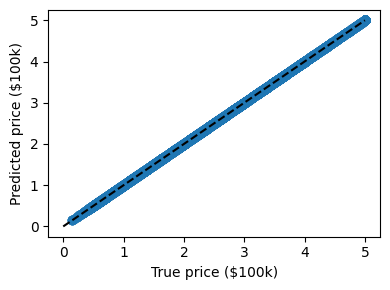

In [60]:
plt.figure(figsize=(4, 3))
plt.scatter(expected, predicted)
plt.plot([0, 5], [0, 5], "--k")
plt.axis("tight")
plt.xlabel("True price ($100k)")
plt.ylabel("Predicted price ($100k)")
plt.tight_layout()

Here again the predictions are seemingly perfect as the model was able to
perfectly memorize the training set.

:::{warning}
**Performance on test set**

Performance on test set does not measure overfit (as described above)
:::

### A correct approach: Using a validation set

Learning the parameters of a prediction function and testing it on the
same data is a methodological mistake: a model that would just repeat the
labels of the samples that it has just seen would have a perfect score
but would fail to predict anything useful on yet-unseen data.

To avoid over-fitting, we have to define two different sets:

- a training set X_train, y_train which is used for learning the
  parameters of a predictive model
- a testing set X_test, y_test which is used for evaluating the fitted
  predictive model

In scikit-learn such a random split can be quickly computed with the
{func}`~sklearn.model_selection.train_test_split` function:

In [61]:
from sklearn import model_selection

X = digits.data
y = digits.target

In [62]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=0)

In [63]:
print("%r, %r, %r" % (X.shape, X_train.shape, X_test.shape))

(1797, 64), (1347, 64), (450, 64)


Now we train on the training data, and test on the testing data:

In [64]:
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [65]:
print(metrics.confusion_matrix(y_test, y_pred))

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  0  0  0  0  0]
 [ 0  0 43  1  0  0  0  0  0  0]
 [ 0  0  0 45  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  1]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  0  0  0  0  0  0  0 48  0]
 [ 0  0  0  1  0  1  0  0  0 45]]


In [66]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.96      0.97        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



The averaged f1-score is often used as a convenient measure of the
overall performance of an algorithm. It appears in the bottom row
of the classification report; it can also be accessed directly:

In [67]:
metrics.f1_score(y_test, y_pred, average="macro")

0.9913675218842191

The over-fitting we saw previously can be quantified by computing the
f1-score on the training data itself:

In [68]:
metrics.f1_score(y_train, clf.predict(X_train), average="macro")

1.0

:::{note}
**Regression metrics** In the case of regression models, we
need to use different metrics, such as explained variance.
:::

### Model Selection via Validation

::: {note}
:class: dropdown

We have applied Gaussian Naives, support vectors machines, and
K-nearest neighbors classifiers to the digits dataset. Now that we
have these validation tools in place, we can ask quantitatively which
of the three estimators works best for this dataset.
:::

With the default hyper-parameters for each estimator, which gives the best f1
score on the **validation set**? Recall that hyperparameters are the
parameters set when you instantiate the classifier: for example, the
`n_neighbors` in `clf = KNeighborsClassifier(n_neighbors=1)`

In [69]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC

In [70]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.25, random_state=0)

In [71]:
for Model in [GaussianNB(), KNeighborsClassifier(), LinearSVC(dual=False)]:
    clf = Model.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('%s: %s' %
          (Model.__class__.__name__, metrics.f1_score(y_test, y_pred, average="macro")))

GaussianNB: 0.8332741681010102
KNeighborsClassifier: 0.9804562804949924


LinearSVC: 0.9365582188220227


::: {exercise-start}
:label: which-hyper-ex
:class: dropdown
:::

For each classifier, which value for the hyperparameters gives the best
results for the digits data? For {class}`~sklearn.svm.LinearSVC`, use
`loss='hinge'` and `loss='squared_hinge'`. For
{class}`~sklearn.neighbors.KNeighborsClassifier` we use `n_neighbors` between
1 and 10. Note that {class}`~sklearn.naive_bayes.GaussianNB` does not have any
adjustable hyperparameters. Your results should look something like this:

```text
LinearSVC(loss='hinge'): 0.9369152611313591
LinearSVC(loss='squared_hinge'): 0.9323387371152745
-------------------
KNeighbors(n_neighbors=1): 0.9913675218842191
KNeighbors(n_neighbors=2): 0.9848442068835102
KNeighbors(n_neighbors=3): 0.9867753449543099
KNeighbors(n_neighbors=4): 0.9803719053818863
KNeighbors(n_neighbors=5): 0.9804562804949924
KNeighbors(n_neighbors=6): 0.9757924194139573
KNeighbors(n_neighbors=7): 0.9780645792142071
KNeighbors(n_neighbors=8): 0.9780645792142071
KNeighbors(n_neighbors=9): 0.9780645792142071
KNeighbors(n_neighbors=10): 0.9755550897728812
```

::: {exercise-end}
:::

::: {solution-start} which-hyper-ex
:class: dropdown
:::

In [72]:
# test SVC loss
for loss in ["hinge", "squared_hinge"]:
    clf = LinearSVC(loss=loss).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        f"LinearSVC(loss='{loss}'): {metrics.f1_score(y_test, y_pred, average='macro')}"
    )
print("-------------------")
# test the number of neighbors
for n_neighbors in range(1, 11):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(
        f"KNeighbors(n_neighbors={n_neighbors}): {metrics.f1_score(y_test, y_pred, average='macro')}"
    )

LinearSVC(loss='hinge'): 0.9389238642104093
LinearSVC(loss='squared_hinge'): 0.9344514479109784
-------------------
KNeighbors(n_neighbors=1): 0.9913675218842191


KNeighbors(n_neighbors=2): 0.9848442068835102
KNeighbors(n_neighbors=3): 0.9867753449543099
KNeighbors(n_neighbors=4): 0.9803719053818863
KNeighbors(n_neighbors=5): 0.9804562804949924
KNeighbors(n_neighbors=6): 0.9757924194139573
KNeighbors(n_neighbors=7): 0.9780645792142071
KNeighbors(n_neighbors=8): 0.9780645792142071
KNeighbors(n_neighbors=9): 0.9780645792142071
KNeighbors(n_neighbors=10): 0.9755550897728812


/Volumes/zorg/mb312/.virtualenvs/sp-lectures/lib/python3.12/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


::: {solution-end}
:::

### Cross-validation

Cross-validation consists in repeatedly splitting the data in pairs of
train and test sets, called 'folds'. Scikit-learn comes with a function
to automatically compute score on all these folds. Here we do
{class}`~sklearn.model_selection.KFold` with k=5.

In [73]:
from sklearn.model_selection import cross_val_score

clf = KNeighborsClassifier()
cross_val_score(clf, X, y, cv=5)

array([0.94722222, 0.95555556, 0.96657382, 0.98050139, 0.9637883 ])

We can use different splitting strategies, such as random splitting:

In [74]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5)
cross_val_score(clf, X, y, cv=cv)

array([0.98333333, 0.98888889, 0.98888889, 0.98333333, 0.98333333])

::: {note}
:class: dropdown

There exist [many different cross-validation
strategies](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)
in scikit-learn. They are often useful to take in account non i.i.d datasets.
:::

### Hyperparameter optimization with cross-validation

Consider regularized linear models, such as _Ridge Regression_, which uses l2
regularization, and _Lasso Regression_, which uses l1 regularization. Choosing
their regularization parameter is important.

Let us set these parameters on the Diabetes dataset, a simple regression
problem. The diabetes data consists of 10 physiological variables (age,
sex, weight, blood pressure) measure on 442 patients, and an indication
of disease progression after one year:

In [75]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
X, y = data.data, data.target
X.shape

(442, 10)

With the default hyper-parameters: we compute the cross-validation score:

In [76]:
from sklearn.linear_model import Ridge, Lasso

for Model in [Ridge, Lasso]:
    model = Model()
    print(f"{Model.__name__}: {cross_val_score(model, X, y).mean()}")

Ridge: 0.410174971340889
Lasso: 0.3375593674654275


#### Basic Hyperparameter Optimization

We compute the cross-validation score as a function of alpha, the
strength of the regularization for {class}`~sklearn.linear_model.Lasso`
and {class}`~sklearn.linear_model.Ridge`. We choose 20 values of alpha
between 0.0001 and 1:

In [77]:
alphas = np.logspace(-3, -1, 30)

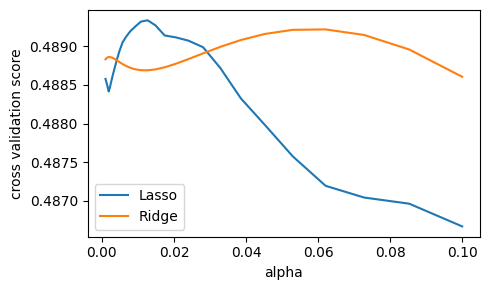

In [78]:
plt.figure(figsize=(5, 3))
for Model in [Lasso, Ridge]:
    scores = [cross_val_score(Model(alpha), X, y, cv=3).mean()
              for alpha in alphas]
    plt.plot(alphas, scores, label=Model.__name__)
plt.legend(loc="lower left")
plt.xlabel("alpha")
plt.ylabel("cross validation score")
plt.tight_layout()

:::{admonition} Question

Can we trust our results to be actually useful?
:::

#### Automatically Performing Grid Search

{class}`sklearn.grid_search.GridSearchCV` is constructed with an
estimator, as well as a dictionary of parameter values to be searched.
We can find the optimal parameters this way:

In [79]:
from sklearn.model_selection import GridSearchCV

for Model in [Ridge, Lasso]:
    gscv = GridSearchCV(Model(), dict(alpha=alphas), cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, gscv.best_params_))

Ridge: {'alpha': np.float64(0.06210169418915616)}
Lasso: {'alpha': np.float64(0.01268961003167922)}


#### Built-in Hyperparameter Search

For some models within scikit-learn, cross-validation can be performed
more efficiently on large datasets. In this case, a cross-validated
version of the particular model is included. The cross-validated
versions of {class}`~sklearn.linear_model.Ridge` and
{class}`~sklearn.linear_model.Lasso` are
{class}`~sklearn.linear_model.RidgeCV` and
{class}`~sklearn.linear_model.LassoCV`, respectively. Parameter search
on these estimators can be performed as follows:

In [80]:
from sklearn.linear_model import RidgeCV, LassoCV
for Model in [RidgeCV, LassoCV]:
    model = Model(alphas=alphas, cv=3).fit(X, y)
    print('%s: %s' % (Model.__name__, model.alpha_))

RidgeCV: 0.06210169418915616
LassoCV: 0.01268961003167922


We see that the results match those returned by GridSearchCV

#### Nested cross-validation

How do we measure the performance of these estimators? We have used data
to set the hyperparameters, so we need to test on actually new data. We
can do this by running {func}`~sklearn.model_selection.cross_val_score`
on our CV objects. Here there are 2 cross-validation loops going on, this
is called _'nested cross validation'_:

In [81]:
for Model in [RidgeCV, LassoCV]:
    scores = cross_val_score(Model(alphas=alphas, cv=3), X, y, cv=3)
    print(Model.__name__, np.mean(scores))

RidgeCV 0.48916033973224776
LassoCV 0.48549086705564237


:::{note}
Note that these results do not match the best results of our curves
above, and {class}`~sklearn.linear_model.LassoCV` seems to
under-perform {class}`~sklearn.linear_model.RidgeCV`. The reason is
that setting the hyper-parameter is harder for Lasso, thus the
estimation error on this hyper-parameter is larger.
:::

## Unsupervised Learning: Dimensionality Reduction and Visualization

Unsupervised learning is applied on X without y: data without labels. A
typical use case is to find hidden structure in the data.

### Dimensionality Reduction: PCA

Dimensionality reduction derives a set of new artificial features smaller
than the original feature set. Here we'll use [Principal Component
Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis), a
dimensionality reduction that strives to retain most of the variance of
the original data. We'll use {class}`sklearn.decomposition.PCA` on the
iris dataset:

In [82]:
X = iris.data
y = iris.target

::: {note}
:class: dropdown

{class}`~sklearn.decomposition.PCA` computes linear combinations of
the original features using a truncated Singular Value Decomposition
of the matrix X, to project the data onto a base of the top singular
vectors.
:::

In [83]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(n_components=2, whiten=True)

Once fitted, {class}`~sklearn.decomposition.PCA` exposes the singular
vectors in the `components_` attribute:

In [84]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

Other attributes are available as well:

In [85]:
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

Let us project the iris dataset along those first two dimensions::

In [86]:
X_pca = pca.transform(X)
X_pca.shape

(150, 2)

{class}`~sklearn.decomposition.PCA` `normalizes` and `whitens` the data, which
means that the data is now centered on both components with unit variance:

In [87]:
X_pca.mean(axis=0)

array([-1.82964754e-15, -1.54172971e-15])

In [88]:
X_pca.std(axis=0, ddof=1)

array([1., 1.])

Furthermore, the samples components do no longer carry any linear
correlation:

In [89]:
np.corrcoef(X_pca.T)

array([[1.00000000e+00, 1.95756908e-14],
       [1.95756908e-14, 1.00000000e+00]])

With a number of retained components 2 or 3, PCA is useful to visualize
the dataset:

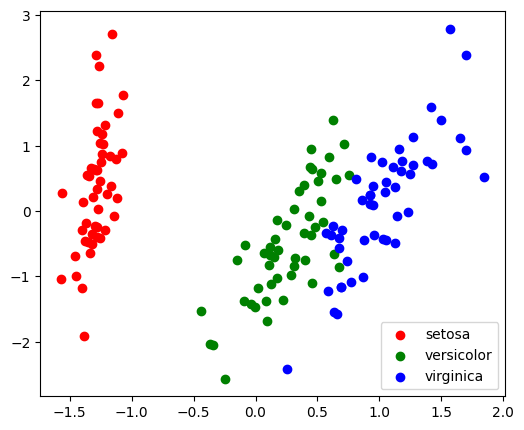

In [90]:
plt.figure(figsize=(6, 5))
target_ids = range(len(iris.target_names))
for i, c, label in zip(target_ids, 'rgbcmykw', iris.target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1],
                c=c, label=label)
plt.legend();

::: {note}
:class: dropdown

Note that this projection was determined _without_ any information
about the labels (represented by the colors): this is the sense in
which the learning is **unsupervised**. Nevertheless, we see that the
projection gives us insight into the distribution of the different
flowers in parameter space: notably, _iris setosa_ is much more
distinct than the other two species.
:::

### Visualization with a non-linear embedding: tSNE

For visualization, more complex embeddings can be useful (for statistical
analysis, they are harder to control). {class}`sklearn.manifold.TSNE` is
such a powerful manifold learning method. We apply it to the _digits_
dataset, as the digits are vectors of dimension 8\*8 = 64. Embedding them
in 2D enables visualization:

In [91]:
# Take the first 500 data points: it's hard to see 1500 points
X = digits.data[:500]
y = digits.target[:500]

In [92]:
# Fit and transform with a TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

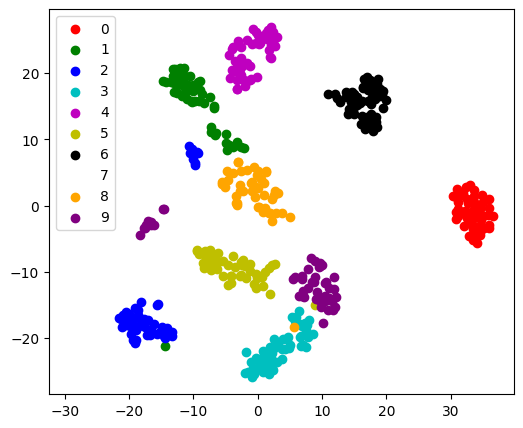

In [93]:
# Visualize the data
target_ids = range(len(digits.target_names))
plt.figure(figsize=(6, 5))
colors = "r", "g", "b", "c", "m", "y", "k", "w", "orange", "purple"
for i, c, label in zip(target_ids, colors, digits.target_names, strict=True):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend();

:::{admonition} fit_transform
As {class}`~sklearn.manifold.TSNE` cannot be applied to new data, we
need to use its `fit_transform` method.
:::

{class}`sklearn.manifold.TSNE` separates quite well the different classes
of digits even though it had no access to the class information.

::: {exercise-start}
:label: digit-dims-ex
:class: dropdown
:::

{mod}`sklearn.manifold` has many other non-linear embeddings. Try
them out on the digits dataset. Could you judge their quality without
knowing the labels `y`?

In [94]:
from sklearn.datasets import load_digits
digits = load_digits()
# ...

::: {exercise-end}
:::

## Parameter selection, Validation, and Testing

### Hyperparameters, Over-fitting, and Under-fitting

:::{admonition} See also

This section is adapted from [Andrew Ng's excellent
Coursera course](https://www.coursera.org/course/ml)
:::

The issues associated with validation and cross-validation are some of
the most important aspects of the practice of machine learning.
Selecting the optimal model for your data is vital, and is a piece of
the problem that is not often appreciated by machine learning
practitioners.

The central question is: **If our estimator is underperforming, how
should we move forward?**

- Use simpler or more complicated model?
- Add more features to each observed data point?
- Add more training samples?

The answer is often counter-intuitive. In particular, **Sometimes using
a more complicated model will give worse results.** Also, **Sometimes
adding training data will not improve your results.** The ability to
determine what steps will improve your model is what separates the
successful machine learning practitioners from the unsuccessful.

#### Bias-variance trade-off: illustration on a simple regression problem

Let us start with a simple 1D regression problem. This
will help us to easily visualize the data and the model, and the results
generalize easily to higher-dimensional datasets. We'll explore a simple
**linear regression** problem, with {mod}`sklearn.linear_model`.

We consider the situation where we have only 2 data point

In [95]:
X = np.c_[0.5, 1].T
y = [0.5, 1]
X_test = np.c_[0, 2].T

Without noise, as linear regression fits the data perfectly

In [96]:
from sklearn import linear_model

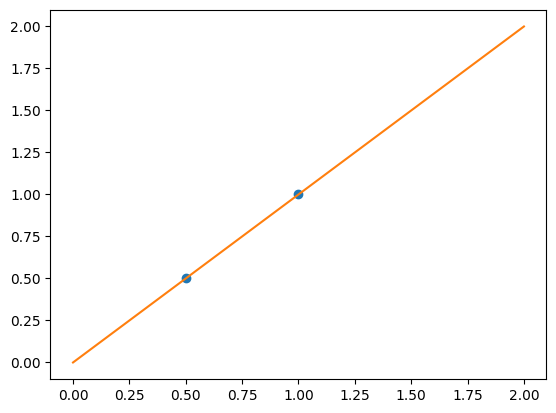

In [97]:
regr = linear_model.LinearRegression()
regr.fit(X, y)
plt.plot(X, y, "o")
plt.plot(X_test, regr.predict(X_test))

In real life situation, we have noise (e.g. measurement noise) in our data:

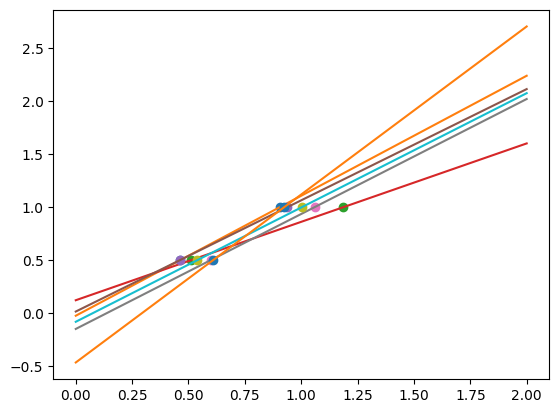

In [98]:
rng = np.random.default_rng(27446968)
for _ in range(6):
    noisy_X = X + rng.normal(loc=0, scale=0.1, size=X.shape)
    plt.plot(noisy_X, y, "o")
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test))

As we can see, our linear model captures and amplifies the noise in the
data. It displays a lot of variance.

We can use another linear estimator that uses regularization, the
{class}`~sklearn.linear_model.Ridge` estimator. This estimator regularizes the
coefficients by shrinking them to zero, under the assumption that very high
correlations are often spurious. The alpha parameter controls the amount of
shrinkage used.

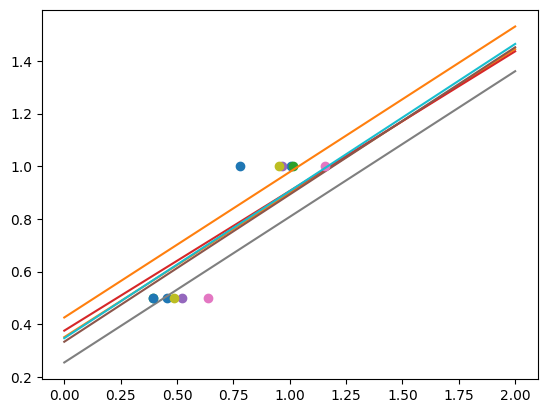

In [99]:
regr = linear_model.Ridge(alpha=0.1)
for _ in range(6):
    noisy_X = X + rng.normal(loc=0, scale=0.1, size=X.shape)
    plt.plot(noisy_X, y, "o")
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test))

As we can see, the estimator displays much less variance. However it
systematically under-estimates the coefficient. It displays a biased
behavior.

This is a typical example of **bias/variance trade-off**: non-regularized
estimator are not biased, but they can display a lot of variance.
Highly-regularized models have little variance, but high bias. This bias
is not necessarily a bad thing: what matters is choosing the
trade-off between bias and variance that leads to the best prediction
performance. For a specific dataset there is a sweet spot corresponding
to the highest complexity that the data can support, depending on the
amount of noise and of observations available.

### Visualizing the Bias/Variance Tradeoff

::: {note}
:class: dropdown

Given a particular dataset and a model (e.g. a polynomial), we'd like to
understand whether bias (underfit) or variance limits prediction, and how
to tune the _hyperparameter_ (here `d`, the degree of the polynomial)
to give the best fit.
:::

On a given data, let us fit a simple polynomial regression model with
varying degrees:

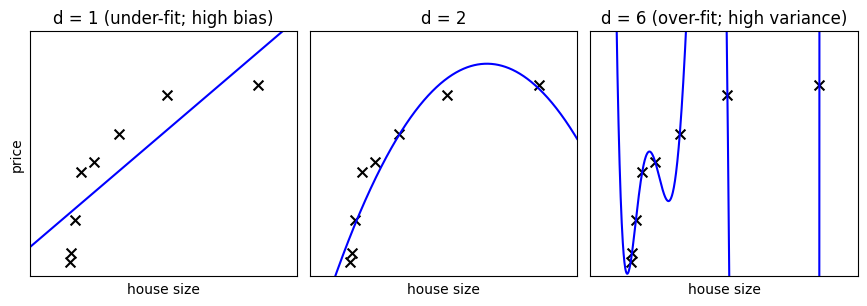

In [100]:
# A polynomial regression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

n_samples = 8

def generating_func(x, rng=None, error=0.5):
    rng = np.random.default_rng(rng)
    return rng.normal(10 - 1.0 / (x + 0.1), error)

rng = np.random.default_rng(27446968)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generating_func(x, rng=rng)

x_test = np.linspace(-0.2, 1.2, 1000)

titles = ["d = 1 (under-fit; high bias)", "d = 2", "d = 6 (over-fit; high variance)"]
degrees = [1, 2, 6]

fig, axes = plt.subplots(1, 3, figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)
for i, d in enumerate(degrees):
    ax = axes[i]
    ax.scatter(x, y, marker="x", c="k", s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)

    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), "-b")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel("house size")
    if i == 0:
        ax.set_ylabel("price")
    ax.set_title(titles[i])

::: {note}
:class: dropdown

In the above figure, we see fits for three different values of `d`.
For `d = 1`, the data is under-fit. This means that the model is too
simplistic: no straight line will ever be a good fit to this data. In
this case, we say that the model suffers from high bias. The model
itself is biased, and this will be reflected in the fact that the data
is poorly fit. At the other extreme, for `d = 6` the data is over-fit.
This means that the model has too many free parameters (6 in this case)
which can be adjusted to perfectly fit the training data. If we add a
new point to this plot, though, chances are it will be very far from the
curve representing the degree-6 fit. In this case, we say that the model
suffers from high variance. The reason for the term "high variance" is
that if any of the input points are varied slightly, it could result in
a very different model.

In the middle, for `d = 2`, we have found a good mid-point. It fits
the data fairly well, and does not suffer from the bias and variance
problems seen in the figures on either side. What we would like is a way
to quantitatively identify bias and variance, and optimize the
metaparameters (in this case, the polynomial degree d) in order to
determine the best algorithm.
:::

#### Polynomial regression with scikit-learn

A polynomial regression is built by pipelining
{class}`~sklearn.preprocessing.PolynomialFeatures`
and a {class}`~sklearn.linear_model.LinearRegression`:

In [101]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

#### Validation Curves

Let us create a dataset like in the example above:

In [102]:
# randomly sample more data
rng = np.random.default_rng(27446968)
x = rng.random(size=200)
y = generating_func(x, rng=rng, error=1.)

Central to quantify bias and variance of a model is to apply it on _test
data_, sampled from the same distribution as the train, but that will
capture independent noise:

In [103]:
# split into training, validation, and testing sets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

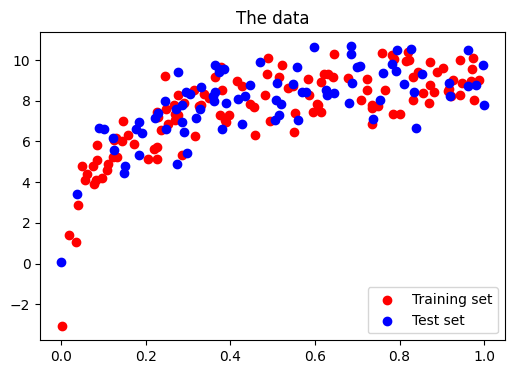

In [104]:
# show the training and validation sets
plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, color="red", label="Training set")
plt.scatter(x_test, y_test, color="blue", label="Test set")
plt.title("The data")
plt.legend(loc="best")

**Validation curve** A validation curve consists in varying a model parameter
that controls its complexity (here the degree of the
polynomial) and measures both error of the model on training data, and on
test data (_eg_ with cross-validation). The model parameter is then
adjusted so that the test error is minimized:

We use {func}`sklearn.model_selection.validation_curve` to compute train
and test error, and plot it:

In [105]:
from sklearn.model_selection import validation_curve

In [106]:
degrees = np.arange(1, 21)
model = make_pipeline(PolynomialFeatures(), LinearRegression())

In [107]:
# Vary the "degrees" on the pipeline step "polynomialfeatures"
train_scores, validation_scores = validation_curve(
                model, x[:, np.newaxis], y,
                param_name='polynomialfeatures__degree',
                param_range=degrees)

Plot the mean train score and validation score across folds:

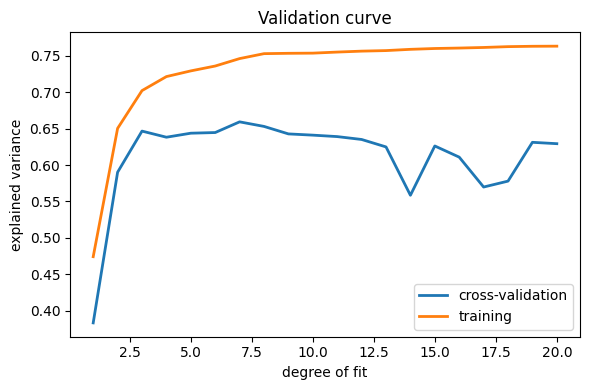

In [108]:
plt.figure(figsize=(6, 4))
plt.plot(degrees, validation_scores.mean(axis=1), lw=2, label="cross-validation")
plt.plot(degrees, train_scores.mean(axis=1), lw=2, label="training")
plt.legend(loc="best")
plt.xlabel("degree of fit")
plt.ylabel("explained variance")
plt.title("Validation curve")
plt.tight_layout()

This figure shows why validation is important. On the left side of the
plot, we have very low-degree polynomial, which under-fit the data. This
leads to a low explained variance for both the training set and the
validation set. On the far right side of the plot, we have a very high
degree polynomial, which over-fits the data. This can be seen in the fact
that the training explained variance is very high, while on the
validation set, it is low. Choosing `d` around 4 or 5 gets us the best
trade-off.

::: {note}
:class: dropdown

The astute reader will realize that something is amiss here: in the
above plot, `d` around 7 gives the best results. But in the previous plot,
we found that `d = 6` vastly over-fits the data. What’s going on here?
The difference is the **number of training points** used. In the
previous example, there were only eight training points. In this
example, we have 100. As a general rule of thumb, the more training
points used, the more complicated model can be used. But how can you
determine for a given model whether more training points will be
helpful? A useful diagnostic for this are learning curves.
:::

#### Learning Curves

A learning curve shows the training and validation score as a
function of the number of training points. Note that when we train on a
subset of the training data, the training score is computed using
this subset, not the full training set. This curve gives a
quantitative view into how beneficial it will be to add training
samples.

:::{admonition} Questions:

- As the number of training samples are increased, what do you expect
  to see for the training score? For the validation score?
- Would you expect the training score to be higher or lower than the
  validation score? Would you ever expect this to change?
  :::

Scikit-learn provides {func}`sklearn.model_selection.learning_curve`:

Here is the pattern for using a learning curve, here with an order 1 polynomial and linear regression:

In [109]:
from sklearn.model_selection import learning_curve

model = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())

train_sizes, train_scores, validation_scores = learning_curve(
    model, x[:, np.newaxis], y, train_sizes=np.logspace(-1, 0, 20))

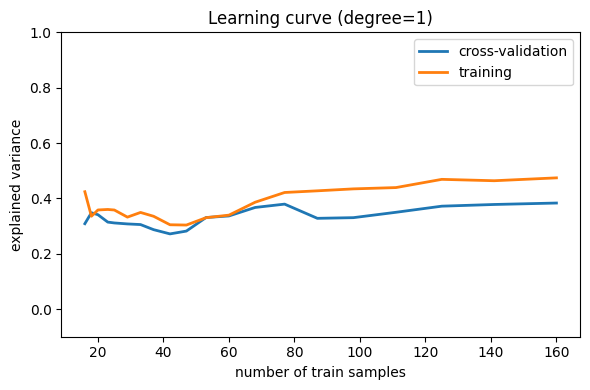

In [110]:
# Plot the mean train score and validation score across folds
def plot_model(d):
    plt.figure(figsize=(6, 4))
    model = make_pipeline(PolynomialFeatures(degree=d), LinearRegression())
    train_sizes, train_scores, validation_scores = learning_curve(
        model, x[:, np.newaxis], y, train_sizes=np.logspace(-1, 0, 20))
    plt.plot(train_sizes, validation_scores.mean(axis=1), lw=2, label='cross-validation')
    plt.plot(train_sizes, train_scores.mean(axis=1), lw=2, label='training')
    plt.ylim(ymin=-0.1, ymax=1)
    plt.legend(loc="best")
    plt.xlabel("number of train samples")
    plt.ylabel("explained variance")
    plt.title(f"Learning curve (degree={d})")
    plt.tight_layout()

plot_model(1)

<!--- Check the plot above -->

Note that the validation score _generally increases_ with a growing
training set, while the training score _generally decreases_ with a
growing training set. As the training size
increases, they will converge to a single value.

From the above discussion, we know that `d = 1` is a high-bias
estimator which under-fits the data. This is indicated by the fact that
both the training and validation scores are low. When confronted
with this type of learning curve, we can expect that adding more
training data will not help: both lines converge to a
relatively low score.

**When the learning curves have converged to a low score, we have a
high bias model.**

A high-bias model can be improved by:

- Using a more sophisticated model (i.e. in this case, increase `d`)
- Gather more features for each sample.
- Decrease regularization in a regularized model.

Increasing the number of samples, however, does not improve a high-bias
model.

Now let's look at a high-variance (i.e. over-fit) model:

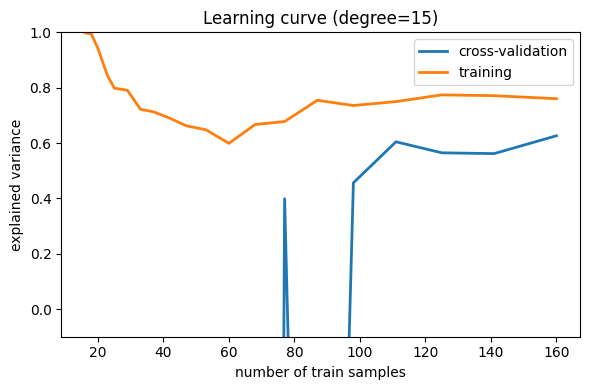

In [111]:
plot_model(15)

Here we show the learning curve for `d = 15`. From the above
discussion, we know that `d = 15` is a **high-variance** estimator
which **over-fits** the data. This is indicated by the fact that the
training score is much higher than the validation score. As we add more
samples to this training set, the training score will continue to
decrease, while the cross-validation error will continue to increase, until they
meet in the middle.

**Learning curves that have not yet converged with the full training
set indicate a high-variance, over-fit model.**

A high-variance model can be improved by:

- Gathering more training samples.
- Using a less-sophisticated model (i.e. in this case, make `d`
  smaller)
- Increasing regularization.

In particular, gathering more features for each sample will not help the
results.

### Summary on model selection

We’ve seen above that an under-performing algorithm can be due to two
possible situations: high bias (under-fitting) and high variance
(over-fitting). In order to evaluate our algorithm, we set aside a
portion of our training data for cross-validation. Using the technique
of learning curves, we can train on progressively larger subsets of the
data, evaluating the training error and cross-validation error to
determine whether our algorithm has high variance or high bias. But what
do we do with this information?

#### High Bias

If a model shows high **bias**, the following actions might help:

- **Add more features**. In our example of predicting home prices, it
  may be helpful to make use of information such as the neighborhood
  the house is in, the year the house was built, the size of the lot,
  etc. Adding these features to the training and test sets can improve
  a high-bias estimator
- **Use a more sophisticated model**. Adding complexity to the model
  can help improve on bias. For a polynomial fit, this can be
  accomplished by increasing the degree d. Each learning technique has
  its own methods of adding complexity.
- **Use fewer samples**. Though this will not improve the
  classification, a high-bias algorithm can attain nearly the same
  error with a smaller training sample. For algorithms which are
  computationally expensive, reducing the training sample size can lead
  to very large improvements in speed.
- **Decrease regularization**. Regularization is a technique used to
  impose simplicity in some machine learning models, by adding a
  penalty term that depends on the characteristics of the parameters.
  If a model has high bias, decreasing the effect of regularization can
  lead to better results.

#### High Variance

If a model shows **high variance**, the following actions might
help:

- **Use fewer features**. Using a feature selection technique may be
  useful, and decrease the over-fitting of the estimator.
- **Use a simpler model**. Model complexity and over-fitting go
  hand-in-hand.
- **Use more training samples**. Adding training samples can reduce the
  effect of over-fitting, and lead to improvements in a high variance
  estimator.
- **Increase Regularization**. Regularization is designed to prevent
  over-fitting. In a high-variance model, increasing regularization can
  lead to better results.

These choices become very important in real-world situations. For
example, due to limited telescope time, astronomers must seek a balance
between observing a large number of objects, and observing a large
number of features for each object. Determining which is more important
for a particular learning task can inform the observing strategy that
the astronomer employs.

### A last word of caution: separate validation and test set

Using validation schemes to determine hyper-parameters means that we are
fitting the hyper-parameters to the particular validation set. In the
same way that parameters can be over-fit to the training set,
hyperparameters can be over-fit to the validation set. Because of this,
the validation error tends to under-predict the classification error of
new data.

For this reason, it is recommended to split the data into three sets:

- The **training set**, used to train the model (usually ~60% of the
  data)
- The **validation set**, used to validate the model (usually ~20% of
  the data)
- The **test set**, used to evaluate the expected error of the
  validated model (usually ~20% of the data)

Many machine learning practitioners do not separate test set and
validation set. But if your goal is to gauge the error of a model on
unknown data, using an independent test set is vital.

:::{admonition} See also

**Going further**

- The [documentation of scikit-learn](https://scikit-learn.org) is
  very complete and didactic.
- [Introduction to Machine Learning with Python](https://shop.oreilly.com/product/0636920030515.do),
  by Sarah Guido, Andreas Müller
  ([notebooks available here](https://github.com/amueller/introduction_to_ml_with_python)).
  :::